# Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
with open("WID_data_IN.csv", "r") as file:
    lines = file.readlines()


print(lines[:5])

['country;variable;percentile;year;value;age;pop\n', 'IN;ehfcari999;p0p100;1990;312.117210157097;999;i\n', 'IN;ehfcari999;p0p100;1991;328.894016002168;999;i\n', 'IN;ehfcari999;p0p100;1992;355.461498859108;999;i\n', 'IN;ehfcari999;p0p100;1993;358.065984849116;999;i\n']


In [ ]:
import pandas as pd



data = [line.strip().split(';') for line in lines]


df = pd.DataFrame(data)


print(df.head())

         0           1           2     3                 4    5    6
0  country    variable  percentile  year             value  age  pop
1       IN  ehfcari999      p0p100  1990  312.117210157097  999    i
2       IN  ehfcari999      p0p100  1991  328.894016002168  999    i
3       IN  ehfcari999      p0p100  1992  355.461498859108  999    i
4       IN  ehfcari999      p0p100  1993  358.065984849116  999    i


In [ ]:
column_names = df.iloc[0]

# Remove the first row (headers) from the data
df = df[1:]

df.columns = column_names


print(df.head())

0 country    variable percentile  year             value  age pop
1      IN  ehfcari999     p0p100  1990  312.117210157097  999   i
2      IN  ehfcari999     p0p100  1991  328.894016002168  999   i
3      IN  ehfcari999     p0p100  1992  355.461498859108  999   i
4      IN  ehfcari999     p0p100  1993  358.065984849116  999   i
5      IN  ehfcari999     p0p100  1994  370.890248959613  999   i


In [5]:
# Ensure all rows have the same number of columns
max_columns = df.shape[1]  # Number of columns in the header
df = df.apply(lambda row: row.tolist() + [None] * (max_columns - len(row)), axis=1, result_type='expand')

# Assign column names again after padding
df.columns = column_names

# Display the cleaned DataFrame
print(df.head())

0 country    variable percentile  year             value  age pop
1      IN  ehfcari999     p0p100  1990  312.117210157097  999   i
2      IN  ehfcari999     p0p100  1991  328.894016002168  999   i
3      IN  ehfcari999     p0p100  1992  355.461498859108  999   i
4      IN  ehfcari999     p0p100  1993  358.065984849116  999   i
5      IN  ehfcari999     p0p100  1994  370.890248959613  999   i


In [6]:
# Check for missing values
print(df.isnull().sum())

# Display basic information about the dataset
print(df.info())

# Display summary statistics for numerical columns
print(df.describe())

0
country       0
variable      0
percentile    0
year          0
value         0
age           0
pop           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351797 entries, 1 to 351797
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   country     351797 non-null  object
 1   variable    351797 non-null  object
 2   percentile  351797 non-null  object
 3   year        351797 non-null  object
 4   value       351797 non-null  object
 5   age         351797 non-null  object
 6   pop         351797 non-null  object
dtypes: object(7)
memory usage: 18.8+ MB
None
0      country    variable percentile    year   value     age     pop
count   351797      351797     351797  351797  351797  351797  351797
unique       1        1080        389     224  202492      40       5
top         IN  sptincj992     p0p100    2015       0     992       j
freq    351797       31817      49481    7116   19190  281810  28642

In [7]:
label_encoder = LabelEncoder()
categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

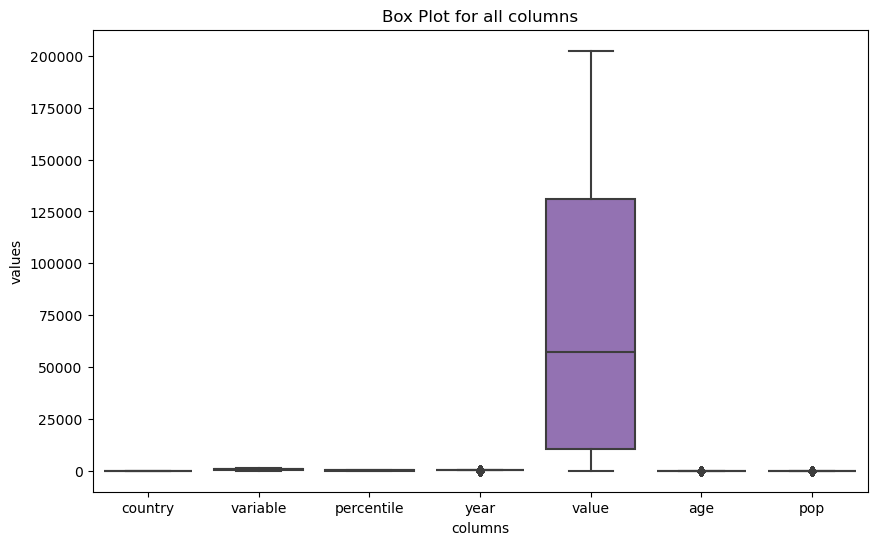

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title("Box Plot for all columns")
plt.xlabel('columns')
plt.ylabel('values')
plt.show()

In [9]:
def cap_outliers(df):
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    
    return df
df= cap_outliers(df)
print("Data after capping outliers:")
print(df)

Data after capping outliers:
0       country  variable  percentile  year   value  age  pop
1             0       522           3   190  117301   39    1
2             0       522           3   191  120465   39    1
3             0       522           3   192  125581   39    1
4             0       522           3   193  126120   39    1
5             0       522           3   194  128294   39    1
...         ...       ...         ...   ...     ...  ...  ...
351793        0      1011           3   216    4409   39    1
351794        0      1011           3   217    4409   39    1
351795        0      1011           3   218    4409   39    1
351796        0      1011           3   219    4409   39    1
351797        0      1011           3   220    4409   39    1

[351797 rows x 7 columns]


In [10]:
df = df.drop('country', axis=1)

In [11]:
df.head()

,variable,percentile,year,value,age,pop
1,522,3,190,117301,39,1
2,522,3,191,120465,39,1
3,522,3,192,125581,39,1
4,522,3,193,126120,39,1
5,522,3,194,128294,39,1


# Model building

In [12]:
X=df.drop(['value'],axis=1)
y=df['value']

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
rf= RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [16]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = r2 * 100  

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)
print("Model Accuracy (R-squared * 100):", accuracy, "%")

Mean Absolute Error: 7410.685768050028
Mean Squared Error: 384666676.58629113
R-squared Score: 0.9088843791530967
Model Accuracy (R-squared * 100): 90.88843791530967 %


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

# Define the parameter grid for n_estimators (from 10 to 200 in steps of 10)
param_grid = {
    "n_estimators": range(10, 201, 10)
}


rf = RandomForestRegressor(random_state=42, n_jobs=1)

# Create the GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring="r2",   
    n_jobs=-1,      
    verbose=1
)


grid_search.fit(X_train, y_train)

# Display the best parameters and best cross-validation score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation R^2 score: {:.2f}".format(grid_search.best_score_))

# Evaluate the best model on the test set
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
test_score = r2_score(y_test, y_pred)
print("Test R^2 score: {:.2f}".format(test_score))


Fitting 5 folds for each of 20 candidates, totalling 100 fits


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 473, in fit
    trees = Parallel(
            ^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\parallel.py", line 63, in __call__
    return super().__call__(iterable_with_config)
           ^^^^^^^

Best parameters: {'n_estimators': 140}
Best cross-validation R^2 score: 0.89
Test R^2 score: 0.91


In [21]:
last_known = df["year"].max()
future_years = np.arange(last_known + 1, 2031)

future_data = []
base_row = df[df["year"] == last_known]

for year in future_years:
    for _, row in base_row.iterrows():
        row_copy = row.copy()
        row_copy["year"] = year
        future_data.append(row_copy)

df_future = pd.DataFrame(future_data)

In [23]:
df_future.shape

(7645417, 6)

In [24]:
df_future.head(10)

,variable,percentile,year,value,age,pop
1064,545,3,224,14680,32,2
1118,547,3,224,16911,32,2
1397,548,3,224,14749,32,2
22963,14,3,224,198086,32,1
61540,15,3,224,167581,39,1
64909,30,3,224,119894,32,1
64963,32,3,224,103343,32,1
65017,33,3,224,64290,39,1
65071,35,3,224,132484,39,1
65192,36,3,224,117984,32,1


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


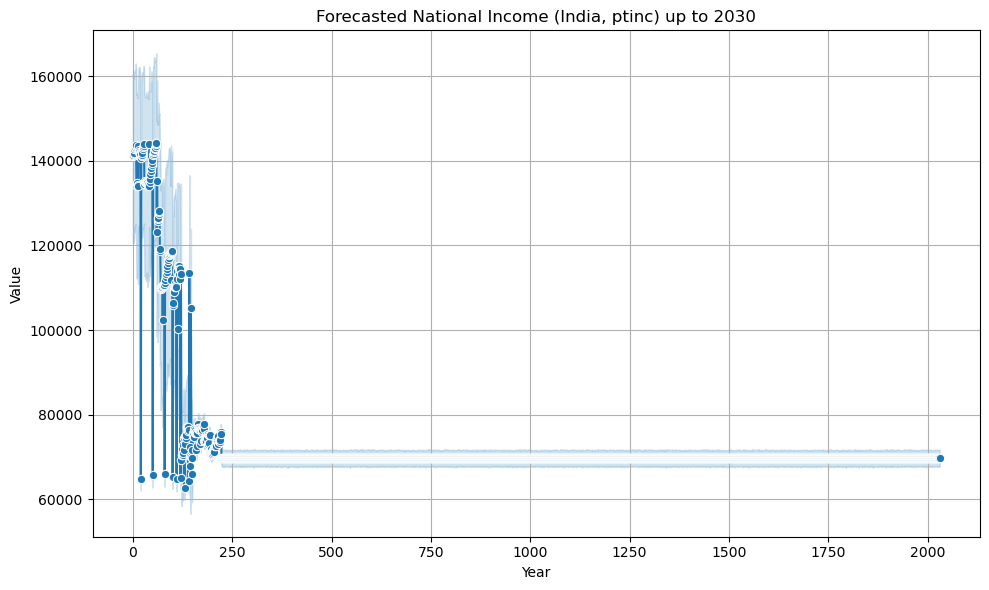

In [27]:
 #One-hot encode future data
features = ["year", "percentile", "variable"]
df_future_model = pd.get_dummies(df_future[features])
df_future_model = df_future_model.reindex(columns=X.columns, fill_value=0)



# Combine historical and forecast for plot
df_combined = pd.concat([
    df[["year", "value"]],
    df_future[["year", "value"]]
])

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_combined, x="year", y="value", marker="o")
plt.title("Forecasted National Income (India, ptinc) up to 2030")
plt.xlabel("Year")
plt.ylabel("Value")
plt.grid(True)
plt.tight_layout()
plt.show()